,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


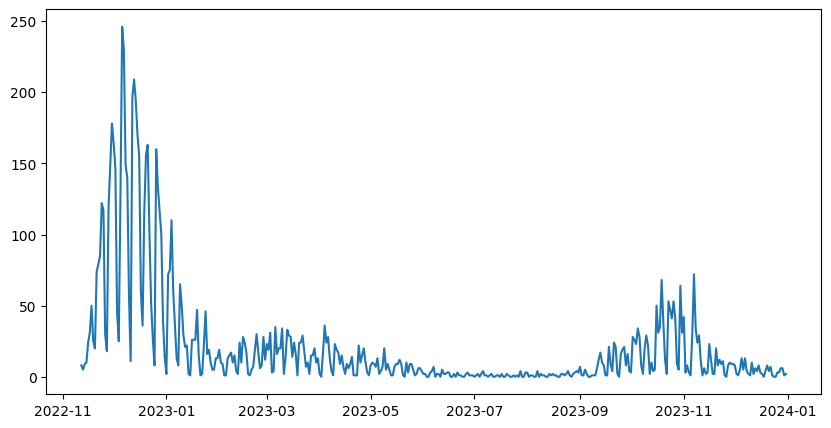

In [3]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# Bagging


In [4]:


mseBG = []
rmseBG= []
maeBG= []

p_BGestimators = []
p_BGmodelo = []

svr = SVR()
knr = KNeighborsRegressor()
mlp = MLPRegressor()

param_grid = {'modelo': [svr, knr, mlp], 'n_estimators':[50,100,150,200]}

melhor_validacao_BG = float('inf')
best_paramsBG = {}



for i in range(20):
    print(i+1)
    for m in param_grid['modelo']:
        for estimators in param_grid['n_estimators']:
            BG = BaggingRegressor(estimator=m, n_estimators=estimators)
            BG.fit(x_treino, y_treino)
            opiniao = BG.predict(x_teste)
            mse_validacao_BG = mean_squared_error(y_teste, opiniao)
            
            if (mse_validacao_BG < melhor_validacao_BG):
                melhor_validacao_BG = mse_validacao_BG
                best_paramsBG = {
                    'modelo':m,
                    'n_estimators':estimators
                }


    print(melhor_validacao_BG)
    print(mse_validacao_BG)
    print(best_paramsBG)


    BG = BaggingRegressor(estimator=best_paramsBG['modelo'], n_estimators=best_paramsBG['n_estimators'])
    
    BG.fit(x_treino, y_treino)
    opiniao_BG = BG.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_BG).round(2)
    mse = mean_squared_error(y_teste, opiniao_BG).round(2)
    rmse = np.sqrt(mse).round(2)

    maeBG.append(mae)
    mseBG.append(mse)
    rmseBG.append(rmse)

    p_BGmodelo.append(best_paramsBG['n_estimators'])
    p_BGestimators.append(best_paramsBG['n_estimators'])



1
403.5718155527264
419.37141750513666
{'modelo': SVR(), 'n_estimators': 100}
2
402.7756935726819
417.1160452290593
{'modelo': SVR(), 'n_estimators': 100}
3
402.7756935726819
418.94666676212535
{'modelo': SVR(), 'n_estimators': 100}
4
402.7756935726819
418.27907273911256
{'modelo': SVR(), 'n_estimators': 100}
5
402.7756935726819
416.4615667241741
{'modelo': SVR(), 'n_estimators': 100}
6
402.7756935726819
416.5792573786961
{'modelo': SVR(), 'n_estimators': 100}
7
402.7756935726819
415.6358598353747
{'modelo': SVR(), 'n_estimators': 100}
8
399.3254928997558
417.00423472731853
{'modelo': SVR(), 'n_estimators': 50}
9
399.3254928997558
418.09486283282587
{'modelo': SVR(), 'n_estimators': 50}
10
399.3254928997558
418.61415701511515
{'modelo': SVR(), 'n_estimators': 50}
11
399.3254928997558
417.10262005521247
{'modelo': SVR(), 'n_estimators': 50}
12
399.3254928997558
417.0859598915204
{'modelo': SVR(), 'n_estimators': 50}
13
399.3254928997558
418.51312615438553
{'modelo': SVR(), 'n_estimators

In [5]:
# RESULTADOS !!!!
maxp_BGestimators = max(set(p_BGestimators), key=p_BGestimators.count)
maxp_BGmodelo = max(set(p_BGmodelo), key=p_BGmodelo.count)



media_maeBG = np.mean(maeBG)
media_mseBG = np.mean(mseBG)
media_rmseBG = np.mean(rmseBG)

p_BGmodelo.append(maxp_BGmodelo)
p_BGestimators.append(maxp_BGestimators)


maeBG.append(media_maeBG)
mseBG.append(media_mseBG)
rmseBG.append(media_rmseBG)

dfBG = pd.DataFrame({
    'modelo': p_BGmodelo,
    'estimators':p_BGestimators,
    'MAE': maeBG,
    'MSE': mseBG,
    'RMSE': rmseBG
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")

display(dfBG)
dfBG.to_csv('resultadosModelos/dfBG.csv', sep = ';', index = False, encoding='UTF-8')


O ÚLTIMO VALOR (20) É A MÉDIA !!!


,modelo,estimators,MAE,MSE,RMSE
0,100,100,13.3000,405.320,20.13
1,100,100,13.3800,405.950,20.15
2,100,100,13.2000,403.470,20.09
3,100,100,13.2100,403.790,20.09
4,100,100,13.2700,404.820,20.12
5,100,100,13.2300,403.770,20.09
6,100,100,13.3400,406.440,20.16
7,50,50,13.0700,401.410,20.04
8,50,50,13.1400,401.860,20.05
9,50,50,13.1800,402.500,20.06


In [6]:
# RESULTADOS !!!!
maxp_BGestimators = max(set(p_BGestimators), key=p_BGestimators.count)



media_maeBG = np.mean(maeBG)
media_mseBG = np.mean(mseBG)
media_rmseBG = np.mean(rmseBG)

p_BGestimators.append(maxp_BGestimators)


maeBG.append(media_maeBG)
mseBG.append(media_mseBG)
rmseBG.append(media_rmseBG)

dfBG = pd.DataFrame({
    'estimators':p_BGestimators,
    'MAE': maeBG,
    'MSE': mseBG,
    'RMSE': rmseBG
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")

display(dfBG)
dfBG.to_csv('resultadosModelos/dfBG.csv', sep = ';', index = False, encoding='UTF-8')


O ÚLTIMO VALOR (20) É A MÉDIA !!!


,estimators,MAE,MSE,RMSE
0,100,13.3000,405.320,20.13
1,100,13.3800,405.950,20.15
2,100,13.2000,403.470,20.09
3,100,13.2100,403.790,20.09
4,100,13.2700,404.820,20.12
5,100,13.2300,403.770,20.09
6,100,13.3400,406.440,20.16
7,50,13.0700,401.410,20.04
8,50,13.1400,401.860,20.05
9,50,13.1800,402.500,20.06


DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


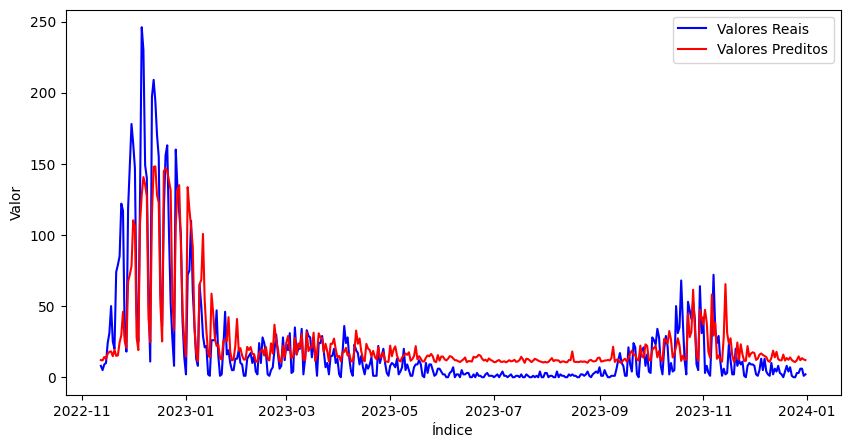

Numero de casos reais:  8737
Numero de casos predito:  10379


In [7]:
len(opiniao_BG)

print(x_teste.index)

serie_BG = pd.Series(opiniao_BG, index=x_teste.index)




plt.figure(figsize=(10, 5))
plt.plot(y_teste, label='Valores Reais', color='blue')
plt.plot(serie_BG, label='Valores Preditos', color='red')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.savefig('graficos/4-bagging.pdf', dpi=300, bbox_inches = "tight")
plt.show()

n_pred = int(opiniao_BG.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)